# Exercise 6: Clusters and Anomalies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb

## Problem 1 : Clustering using GrLivArea and GarageArea

In [3]:
houseData = pd.read_csv('../data/train.csv')

#### a) Extract the two variables

In [15]:
X = pd.DataFrame(houseData[['GrLivArea' , 'GarageArea']])

#### b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot.

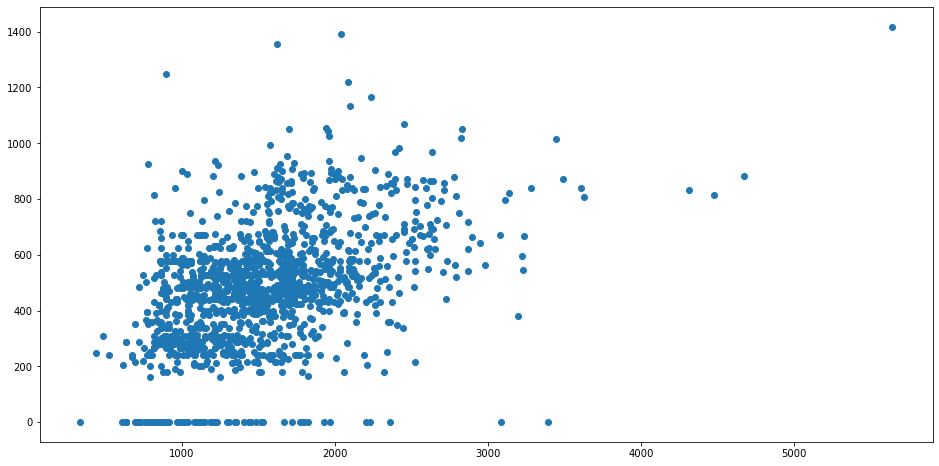

In [18]:
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(x='GrLivArea' , y = 'GarageArea' , data=X)

#### c) Import k-Means Clustering model from Scikit-Learn : from sklearn.cluster import KMeans

In [20]:
from sklearn.cluster import KMeans

#### d) Guess the number of clusters from the 2D scatterplot, and perform k-Means clustering with that.

In [21]:
numOfClusters = 3
kmeans = KMeans(n_clusters = numOfClusters)
kmeans.fit(X)

KMeans(n_clusters=3)

#### e) Print the cluster centers, view their countplot, and visualize the clusters on the 2D scatterplot.

In [24]:
print('Features' , '\tGrLivArea' , '\tGarageArea')
for i , center in enumerate(kmeans.cluster_centers_):
    print('Cluster' , i , end=":\t")
    for location in center:
        print(round(location , 2),'   ', end = "\t" )
    print()

Features 	GrLivArea 	GarageArea
Cluster 0:	1694.9    	522.78    	
Cluster 1:	1085.01    	374.29    	
Cluster 2:	2570.17    	678.3    	


<AxesSubplot:xlabel='Cluster', ylabel='count'>

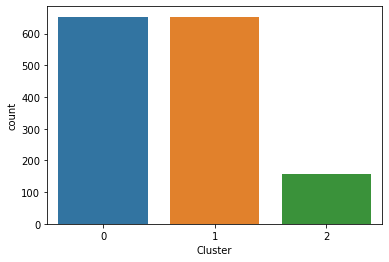

In [26]:
labels = kmeans.predict(X)
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)
sb.countplot(x=X_labeled["Cluster"])

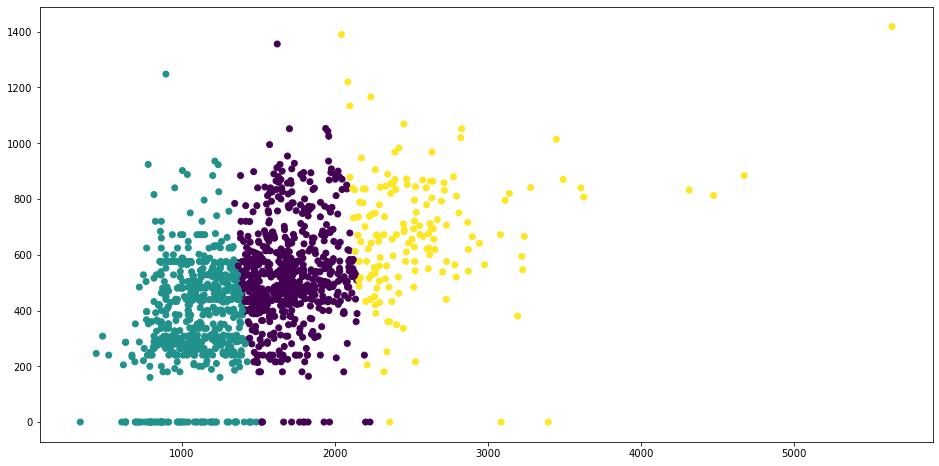

In [27]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

## Problem 2 : Anomaly Detection with the same Variables

#### a) Import Anomaly model from Scikit-Learn : from sklearn.neighbors import LocalOutlierFactor

In [28]:
from sklearn.neighbors import LocalOutlierFactor

#### b) Guess the parameters from the 2D scatterplot, and perform Anomaly Detection with those parameters.

In [29]:
num_neighbors = 50
frac = 0.1
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = frac)
lof.fit(X)

LocalOutlierFactor(contamination=0.1, n_neighbors=50)

#### c) View their countplot of Anomalies vs Normal Data, and visualize the anomalies on the 2D scatterplot.

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

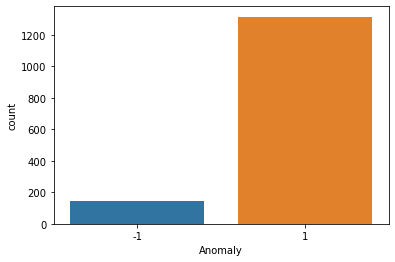

In [30]:
labels = lof.fit_predict(X)
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)
sb.countplot(x=X_labeled["Anomaly"])

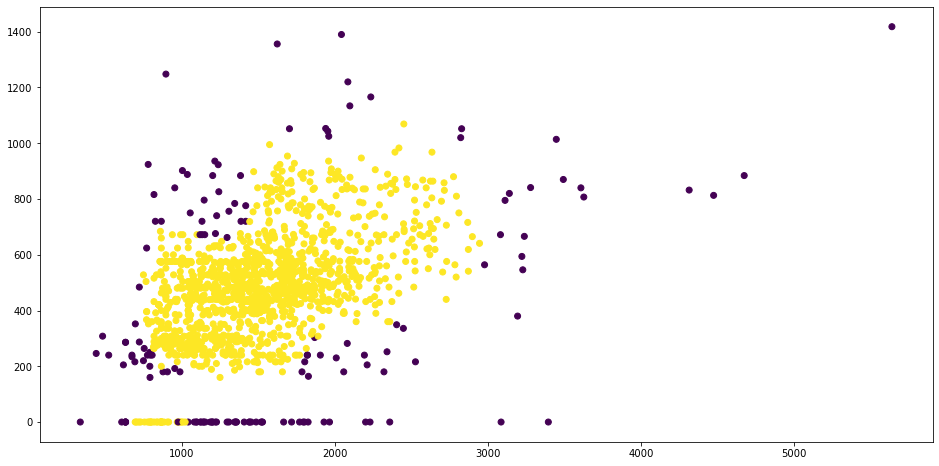

In [31]:
f, axes = plt.subplots(1,1,figsize = (16,8))
plt.scatter(x = 'GrLivArea' , y = 'GarageArea' , c = 'Anomaly' , cmap ='viridis' , data = X_labeled)